# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
   #  city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | zaliztsi
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | newport
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | padang
Processing Record 8 of Set 1 | hailar
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | mwense
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | tomohon
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | la grande
Processing Record 20 of Set 1 | karauzyak
City not found. Skipping...
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 |

City not found. Skipping...
Processing Record 35 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 36 of Set 4 | owerri
Processing Record 37 of Set 4 | mount isa
Processing Record 38 of Set 4 | viytivka
Processing Record 39 of Set 4 | suntar
Processing Record 40 of Set 4 | luanda
Processing Record 41 of Set 4 | yantal
Processing Record 42 of Set 4 | pedasi
Processing Record 43 of Set 4 | kloulklubed
Processing Record 44 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 45 of Set 4 | san lucas
Processing Record 46 of Set 4 | hasaki
Processing Record 47 of Set 4 | manjacaze
Processing Record 48 of Set 4 | athens
Processing Record 49 of Set 4 | mazamet
Processing Record 0 of Set 5 | sri aman
Processing Record 1 of Set 5 | mamakan
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | kaili
Processing Record 4 of Set 5 | saint-joseph
Processing Record 5 of Set 5 | havre-saint-pierre
Processing Record 6 of Set 5 | amvrosiyivka
Processing Reco

Processing Record 26 of Set 8 | pont-rouge
Processing Record 27 of Set 8 | clarence town
Processing Record 28 of Set 8 | nicoya
Processing Record 29 of Set 8 | komsomolskiy
Processing Record 30 of Set 8 | bucerias
Processing Record 31 of Set 8 | sisimiut
Processing Record 32 of Set 8 | bandarbeyla
Processing Record 33 of Set 8 | fuzhou
Processing Record 34 of Set 8 | deputatskiy
Processing Record 35 of Set 8 | wilkie
Processing Record 36 of Set 8 | yirol
City not found. Skipping...
Processing Record 37 of Set 8 | isangel
Processing Record 38 of Set 8 | gryazi
Processing Record 39 of Set 8 | wanning
Processing Record 40 of Set 8 | balaghat
Processing Record 41 of Set 8 | greenock
Processing Record 42 of Set 8 | sangre grande
Processing Record 43 of Set 8 | marsh harbour
Processing Record 44 of Set 8 | slantsy
Processing Record 45 of Set 8 | fujin
Processing Record 46 of Set 8 | arzgir
Processing Record 47 of Set 8 | locri
Processing Record 48 of Set 8 | narsipatnam
Processing Record 49 

Processing Record 17 of Set 12 | vanderhoof
Processing Record 18 of Set 12 | hobbs
Processing Record 19 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 20 of Set 12 | awbari
Processing Record 21 of Set 12 | guerrero negro
Processing Record 22 of Set 12 | kabompo
Processing Record 23 of Set 12 | hobyo
Processing Record 24 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 25 of Set 12 | san rafael
Processing Record 26 of Set 12 | virtsu
Processing Record 27 of Set 12 | terney
Processing Record 28 of Set 12 | redlands
Processing Record 29 of Set 12 | arica
Processing Record 30 of Set 12 | bhakkar
Processing Record 31 of Set 12 | yokadouma
Processing Record 32 of Set 12 | taburi
City not found. Skipping...
Processing Record 33 of Set 12 | chapais
Processing Record 34 of Set 12 | columbia
City not found. Skipping...
Processing Record 35 of Set 12 | trinidad
Processing Record 36 of Set 12 | usinsk
Processing Record 37 of Set 12 | masuguru
Processing R

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,39.94,75,92,1.01,US,1675711222
1,zaliztsi,49.7919,25.3730,14.90,94,45,6.44,UA,1675711245
2,busselton,-33.6500,115.3333,66.85,78,84,12.08,AU,1675711245
3,newport,51.5877,-2.9984,43.68,87,53,2.28,GB,1675711145
4,ushuaia,-54.8000,-68.3000,56.86,62,75,18.41,AR,1675711246


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,39.94,75,92,1.01,US,1675711222
1,zaliztsi,49.7919,25.3730,14.90,94,45,6.44,UA,1675711245
2,busselton,-33.6500,115.3333,66.85,78,84,12.08,AU,1675711245
3,newport,51.5877,-2.9984,43.68,87,53,2.28,GB,1675711145
4,ushuaia,-54.8000,-68.3000,56.86,62,75,18.41,AR,1675711246
...,...,...,...,...,...,...,...,...,...
558,prescott valley,34.5894,-112.3252,48.24,31,20,17.27,US,1675711684
559,steinbach,50.1667,8.5667,39.07,68,75,9.22,DE,1675711861
560,college,64.8569,-147.8028,-2.25,71,75,0.00,US,1675711619


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

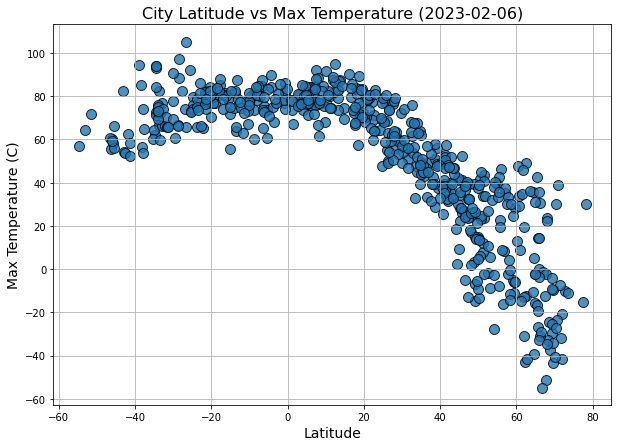

In [39]:
# Build scatter plot for latitude vs. temperature
curr_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(latitude, max_temp, s=100, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (C)', fontsize=14)
plt.grid()
          
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

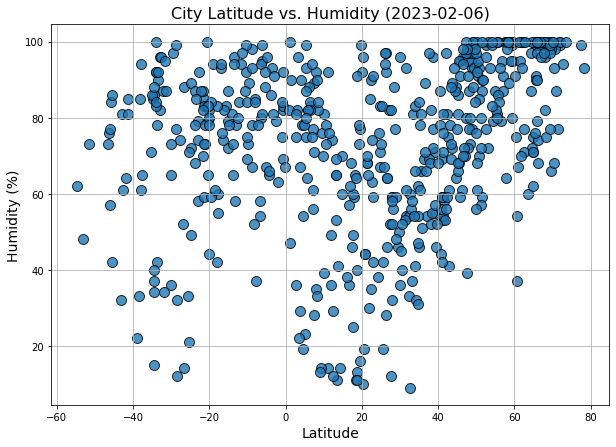

In [40]:
# Build the scatter plots for latitude vs. humidity
curr_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
humid = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(latitude, humid, s = 100, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.grid()
          
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

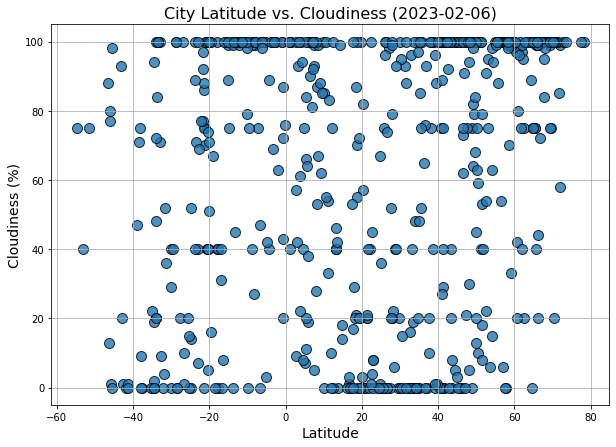

In [41]:
# Build the scatter plots for latitude vs. cloudiness
curr_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
clouds = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(latitude, clouds, s=100, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.grid()
          
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

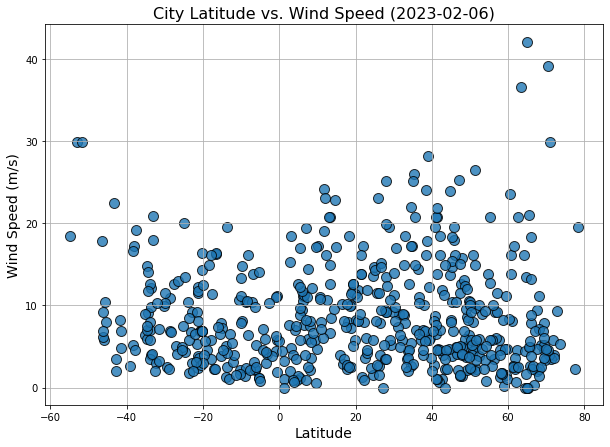

In [42]:
# Build the scatter plots for latitude vs. wind speed
curr_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
wind = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(latitude, wind, s=100, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.grid()
        
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [108]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    # Retrieve regression values
    regress_values = x_axis * slope + intercept
    
    # Line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    
    # Build the scatter plots 

    fig1, ax1 = plt.subplots(figsize=(10,7))
    plt.scatter(x_axis, y_axis, s=100, marker="o", alpha=0.8)
    plt.plot(x_axis,regress_values,"r-")  
    
    # Incorporate the other graph properties
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} ({curr_date})",fontsize = 16)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,39.94,75,92,1.01,US,1675711222
1,zaliztsi,49.7919,25.3730,14.90,94,45,6.44,UA,1675711245
3,newport,51.5877,-2.9984,43.68,87,53,2.28,GB,1675711145
6,hailar,49.2000,119.7000,-14.94,100,82,5.10,CN,1675711248
7,kapaa,22.0752,-159.3190,77.32,85,40,17.27,US,1675711251


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,busselton,-33.6500,115.3333,66.85,78,84,12.08,AU,1675711245
4,ushuaia,-54.8000,-68.3000,56.86,62,75,18.41,AR,1675711246
5,padang,-0.9492,100.3543,76.60,75,100,4.41,ID,1675711001
8,port lincoln,-34.7333,135.8667,62.20,85,0,14.79,AU,1675711252
9,punta arenas,-53.1500,-70.9167,64.51,48,40,29.93,CL,1675711086


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7666514956216278


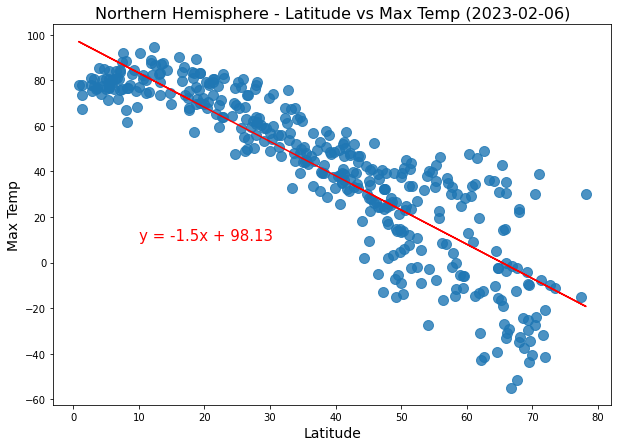

In [119]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Max Temp', 'Northern', (10, 10))
          
# Save Figure
plt.savefig("../output_data/fig1_northern_regression.png")
# Show plot
plt.show()

The r-squared is: 0.15439344446565653


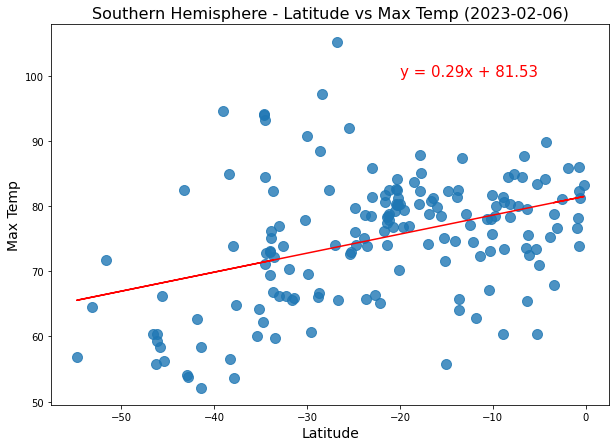

In [110]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Max Temp', 'Southern', (-20, 100))
          
# Save Figure
plt.savefig("../output_data/fig1_southern_regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.22434307897640077


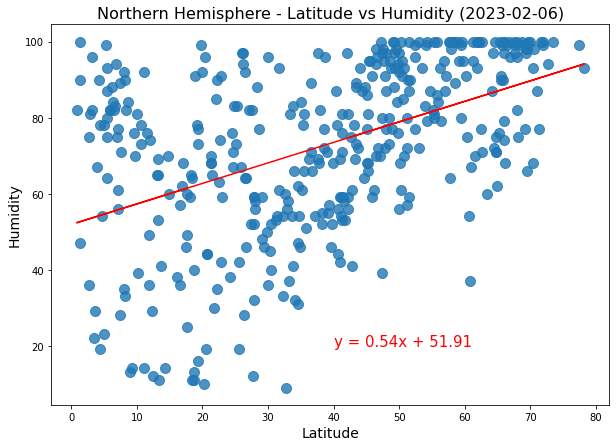

In [111]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. humidity
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Humidity', 'Northern', (40, 20))
          
# Save Figure
plt.savefig("../output_data/fig2_northern_regression.png")
# Show plot
plt.show()

The r-squared is: 0.059291444734236955


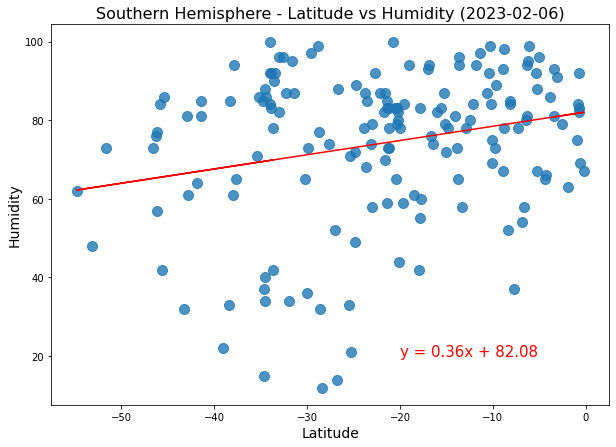

In [112]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. humidity
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Humidity', 'Southern', (-20, 20))
          
# Save Figure
plt.savefig("../output_data/fig2_southern_regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.08460511813819717


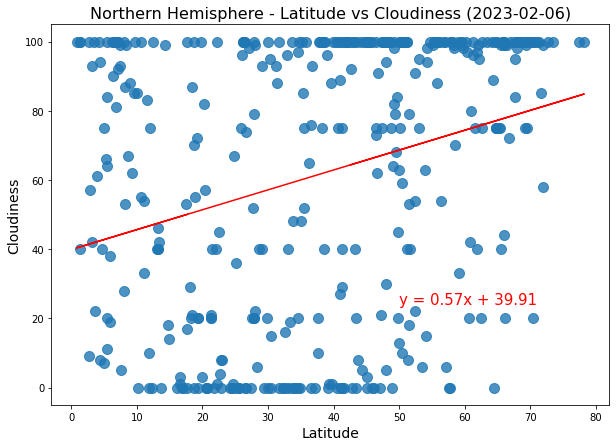

In [113]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Cloudiness', 'Northern', (50, 24))
          
# Save Figure
plt.savefig("../output_data/fig3_northern_regression.png")
# Show plot
plt.show()

The r-squared is: 0.13530912284325367


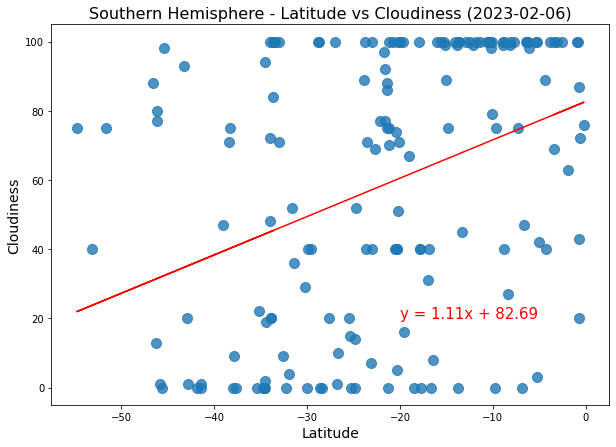

In [114]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Cloudiness', 'Southern', (-20, 20))
          
# Save Figure
plt.savefig("../output_data/fig3_southern_regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.004105631205593792


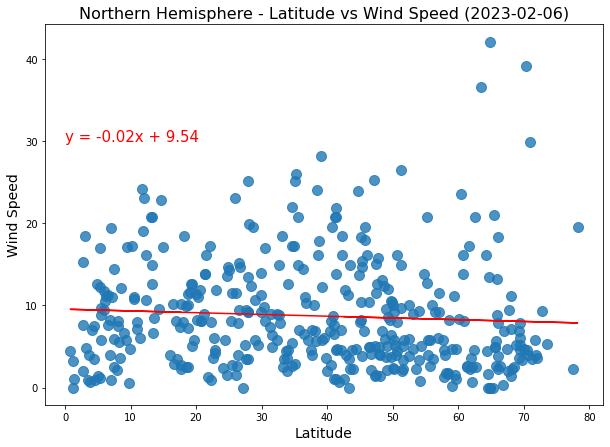

In [115]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. wind speed
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Wind Speed', 'Northern', (0, 30))
          
# Save Figure
plt.savefig("../output_data/fig4_northern_regression.png")
# Show plot
plt.show()

The r-squared is: 0.10378035410080118


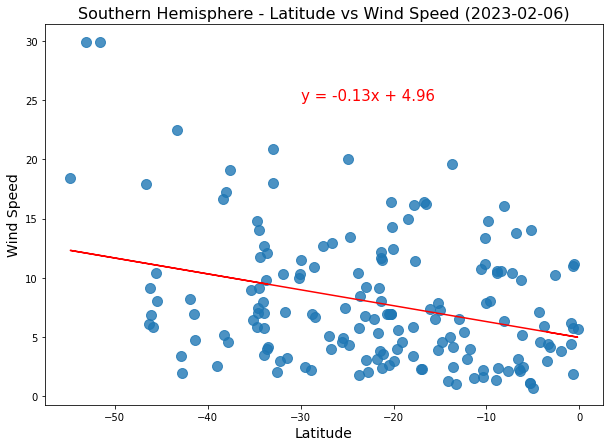

In [118]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. wind speed
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Wind Speed', 'Southern', (-30, 25))
          
# Save Figure
plt.savefig("../output_data/fig4_southern_regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE